In [11]:
# Followig leson https://www.youtube.com/watch?v=j98smr5zsp8
# Crypto currency analysis 
# BitCoin, Ethereum and others
# Data can be downloaded from here https://www.coindesk.com/ (press on e.g. BitCoin and then on icon 'export data' and chose csv data format)


In [12]:
#Import needed libraries
import numpy as np
import pandas as pd


In [14]:
#Load the data
from google.colab import files
uploaded = files.upload()
# I used these files
#ETH_USD_2015-08-09_2020-09-27-CoinDesk.csv
#BTC_USD_2013-10-01_2020-09-27-CoinDesk.csv
#XLM_USD_2019-09-28_2020-09-27-CoinDesk.csv
#XRP_USD_2019-09-28_2020-09-27-CoinDesk.csv

Saving LTC_USD_2019-09-28_2020-09-27-CoinDesk.csv to LTC_USD_2019-09-28_2020-09-27-CoinDesk (1).csv
Saving BTC_USD_2019-09-28_2020-09-27-CoinDesk.csv to BTC_USD_2019-09-28_2020-09-27-CoinDesk (1).csv
Saving ETH_USD_2019-09-28_2020-09-27-CoinDesk.csv to ETH_USD_2019-09-28_2020-09-27-CoinDesk (2).csv


In [15]:
# Store the data into dataframe
df_btc = pd.read_csv('BTC_USD_2019-09-28_2020-09-27-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2019-09-28_2020-09-27-CoinDesk.csv')
df_ltc = pd.read_csv('LTC_USD_2019-09-28_2020-09-27-CoinDesk.csv')

#Print the first 4 rows of each crypto currency 
df_btc.head(4)
df_eth.head(4)
df_ltc.head(4)
#print(df_btc)
#print(df_eth)
#print(df_ltc)




,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-09-28,55.849693,55.674250,56.812660,52.804263
1,LTC,2019-09-29,55.247983,55.979692,56.270257,53.902446
2,LTC,2019-09-30,54.457780,55.249662,55.622270,52.282110
3,LTC,2019-10-01,55.713708,53.925979,56.351489,52.614181


In [16]:
# take the closing price of these 3 crypro currencies
df= pd.DataFrame({'BTC': df_btc['Closing Price (USD)'],
'ETH': df_eth['Closing Price (USD)'],
'LTC': df_ltc['Closing Price (USD)']})

In [17]:
# Show
df

,BTC,ETH,LTC
0,8195.210697,172.738932,55.849693
1,8146.414032,172.997552,55.247983
2,8085.713290,171.007320,54.457780
3,8241.341470,177.916879,55.713708
4,8333.689190,176.931303,56.095710
...,...,...,...
360,10531.164563,345.141828,44.460289
361,10260.033012,322.334907,43.047413
362,10672.956808,348.988840,44.778844
363,10729.069607,354.781832,46.308526


In [18]:
# get statistics on the data
df.describe()

,BTC,ETH,LTC
count,365.000000,365.000000,365.000000
mean,8870.860620,222.223673,50.865570
std,1494.844629,83.442263,9.917760
min,4944.702336,107.898345,32.053195
25%,7612.740574,163.937208,43.437792
50%,9048.715119,197.310225,47.584553
75%,9681.377411,243.228194,57.807628
max,12399.111885,480.555222,83.644499


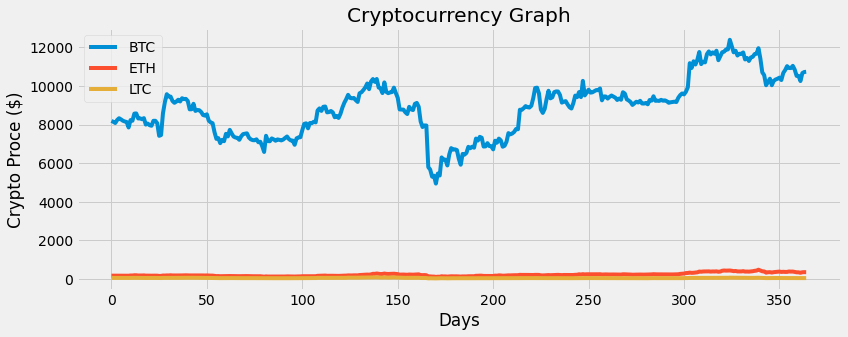

In [19]:
# Visualize the  crypto currency closing prices
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
my_crypto = df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label=c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Proce ($)')
plt.legend(my_crypto.columns.values, loc='upper left')

In [21]:
# Scale the data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)

scaled


array([[43.60517543, 17.39954118, 46.12501873],
       [42.95057409, 17.46894023, 44.95871648],
       [42.136281  , 16.9348746 , 43.427057  ],
       ...,
       [76.843839  , 64.6950344 , 24.66626838],
       [77.5965854 , 66.24954536, 27.63126782],
       [77.76302192, 66.05189458, 27.10034973]])

In [22]:
# Convert the scaled data into dataFrame
df_scale = pd.DataFrame(scaled, columns = df.columns)


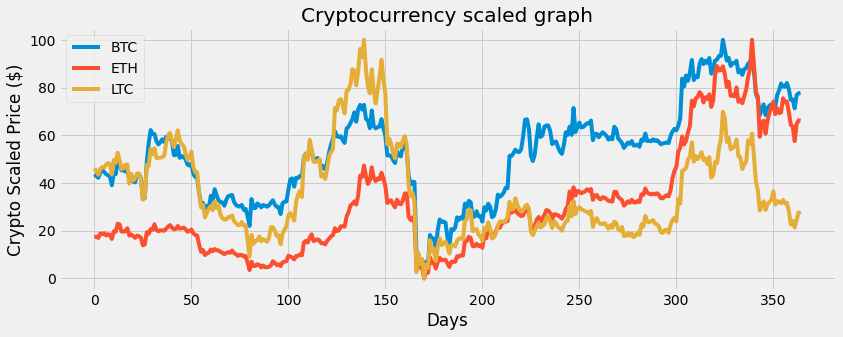

In [25]:
#Visualize
my_crypto = df_scale
plt.figure(figsize=(12.4,4.5))
for c in my_crypto: 
  plt.plot(my_crypto[c], label=c)

plt.title('Cryptocurrency scaled graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()


In [26]:
# Get the daily simple return
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.005954,0.001497,-0.010774
2,-0.007451,-0.011504,-0.014303
3,0.019247,0.040405,0.023062
4,0.011205,-0.005540,0.006857
...,...,...,...
360,0.000471,-0.006981,0.017244
361,-0.025746,-0.066080,-0.031778
362,0.040246,0.082690,0.040221
363,0.005257,0.016599,0.034161


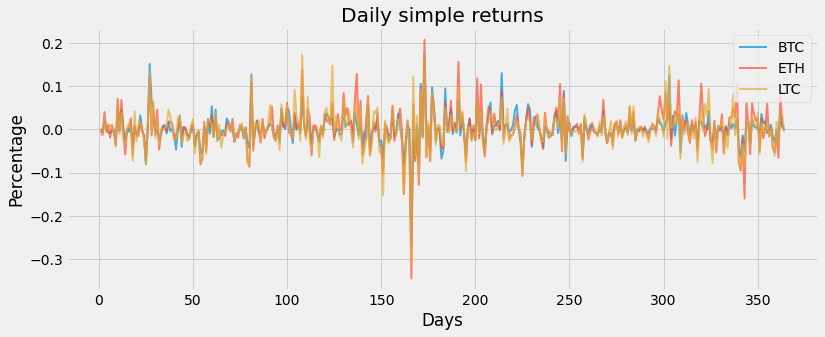

In [29]:
# Visualize the daily simple returns
plt.figure(figsize=(12, 4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label=c, lw=2, alpha=0.7)

plt.title('Daily simple returns')
plt.ylabel('Percentage')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc='upper right')
plt.show()
